In [1]:
#!/usr/bin/env python3
"""
Main file
"""
import numpy as np
from policy_gradient import policy


weight = np.ndarray((4, 2), buffer=np.array([
    [4.17022005e-01, 7.20324493e-01], 
    [1.14374817e-04, 3.02332573e-01], 
    [1.46755891e-01, 9.23385948e-02], 
    [1.86260211e-01, 3.45560727e-01]
    ]))
state = np.ndarray((1, 4), buffer=np.array([
    [-0.04428214,  0.01636746,  0.01196594, -0.03095031]
    ]))

res = policy(state, weight)
print(res)

[[0.50351642 0.49648358]]


In [2]:
#!/usr/bin/env python3
"""
Main file
"""
import gym
import numpy as np
#from policy_gradient import policy_gradient
from policy_gradient import policy

# Vectorized softmax Jacobian
def softmax_grad(softmax):
    s = softmax.reshape(-1,1)
    return np.diagflat(s) - np.dot(s, s.T)

def policy_gradient(state, weight):
    """
    ****************************************************
    ******computes the Monte-Carlo policy gradient******
    ********based on a state and a weight matrix********
    ****************************************************
    @state: matrix representing the current
            observation of the environment
    @weight: matrix of random weight
    Return: the action and the gradient
    """
    policy_value = policy(state, weight)
    action = np.random.choice((policy_value[0]).shape[0],
                              p=policy_value[0])

    grad = state.T - (state.T * policy_value[:, None]).sum(axis=0)
    return action, grad

env = gym.make('CartPole-v1')
np.random.seed(0)
env.seed(0)
weight = np.random.rand(4, 2)
state = env.reset()[None,:]

print(weight)
print(state)

action, grad = policy_gradient(state, weight)
print(action)
print(grad)


env.close()

[[0.5488135  0.71518937]
 [0.60276338 0.54488318]
 [0.4236548  0.64589411]
 [0.43758721 0.891773  ]]
[[-0.04456399  0.04653909  0.01326909 -0.02099827]]
1
[[-0.02209599 -0.02246801]
 [ 0.02307529  0.0234638 ]
 [ 0.00657916  0.00668993]
 [-0.01041149 -0.01058678]]


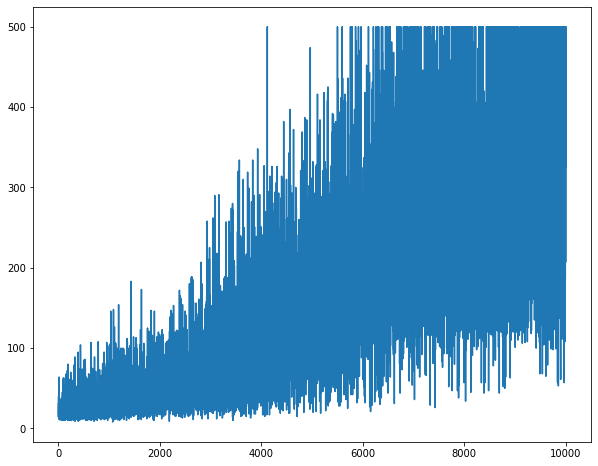

In [63]:
"""
Main file
"""
import gym
import matplotlib.pyplot as plt
import numpy as np
import time
#%matplotlib inline
#from train import train
#from policy_gradient import policy_gradient
def train(env, nb_episodes, alpha=0.000045, gamma=0.98, show_result=False):
    """
    *********************************************
    ******Implementation of a full training******
    *********************************************
    @env: initial environment
    @nb_episodes: number of episodes used for training
    @alpha: the learning rate
    @gamma: the discount factor
    Return:
        all values of the score (sum of all rewards
        during one episode loop)
    """
    # Inisiate scores list
    scores = []
    # Initiate θ to random
    # np.random.seed(0)
    # env.seed(0)
    W = np.random.rand(env.observation_space.shape[0],
                       env.action_space.n)
    # W = np.zeros((env.observation_space.shape[0],
    #                          env.action_space.n))
    for ep in range(nb_episodes):
        # Generating episode
        # Reseting the environment each time as per requirement
        state = env.reset()[None,:]
        # initiate needed variabes
        done = False
        t = 0
        R = []
        Grads = []
        Actions = []
        while not done:
            # Renderig the environment every 1000 
            if show_result and not ep % 1000:
                env.render()
            # taking action
            action, grad = policy_gradient(state, W)
            # Taking the action and getting the reward and outcome state
            new_state, Returns, done, info = env.step(action)
            # Appending needed Values
            Actions.append(action)
            R.append(Returns)
            Grads.append(grad)
            state = new_state[None,:]
            t += 1
        # Appending summed score
        scores.append(sum(R))
        print("Episode N°: "+ str(ep) +" Score: "+ str(sum(R)), end="\r", flush=False)

        # Updating θ
        # initiate needed variabes
        G = 0  # empirical return
        T = t
        for t in range(T):
            Returns = R[t]
            action = Actions[t]
            # Gt = ∑k=0 to ∞ (γ^(k) * R(t+k+1)).
            G = sum(gamma**(k) * R[k+t+1] for k in range(T-t-1))
            # θ ← θ + α * γ^(t) * Gt * ∇θlnπθ(At|St) ; from Barto Satton book
            # W[:, action] += alpha * Grads[t][:, action] * gamma**(t) * G
            # θ ← θ + α * ∇θlogπθ(st, at) * vt ; from David Silver course
            W[:, action] += alpha * Grads[t][:, action] * G 

    return scores

env = gym.make('CartPole-v1')

scores = train(env, 10000)
#scores = train(env, 10000, alpha=2**-14)

plt.figure(figsize=(10, 8))
plt.plot(np.arange(len(scores)), scores)
plt.show()

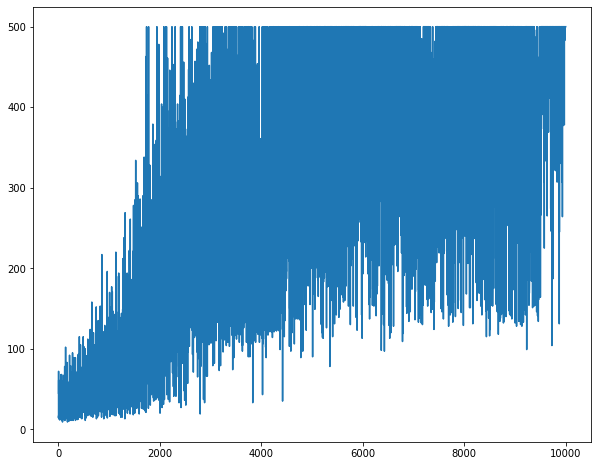

In [65]:
env = gym.make('CartPole-v1')

scores1 = train(env, 10000, alpha=2**-13)

plt.figure(figsize=(10, 8))
plt.plot(np.arange(len(scores1)), scores1)
plt.show()
